In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# DATA PREPROCESSING

In [2]:
# loading the data
# df_test = pd.read_csv("customer_churn_dataset-testing-master.csv")
df_train = pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
df_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
# print('test data: ', df_test.shape)
print("train data: ", df_train.shape)

train data:  (203376, 12)


In [5]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203376 entries, 0 to 203375
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         203375 non-null  float64
 1   Age                203375 non-null  float64
 2   Gender             203375 non-null  object 
 3   Tenure             203375 non-null  float64
 4   Usage Frequency    203375 non-null  float64
 5   Support Calls      203375 non-null  float64
 6   Payment Delay      203375 non-null  float64
 7   Subscription Type  203375 non-null  object 
 8   Contract Length    203375 non-null  object 
 9   Total Spend        203374 non-null  float64
 10  Last Interaction   203374 non-null  float64
 11  Churn              203374 non-null  float64
dtypes: float64(9), object(3)
memory usage: 18.6+ MB
None


In [6]:
print(df_train.describe())

          CustomerID            Age         Tenure  Usage Frequency  \
count  203375.000000  203375.000000  203375.000000    203375.000000   
mean   104438.845635      41.645679      30.496202        15.495744   
std     60546.408189      13.927962      17.341944         8.678489   
min         2.000000      18.000000       1.000000         1.000000   
25%     51672.500000      30.000000      15.000000         8.000000   
50%    104734.000000      42.000000      30.000000        15.000000   
75%    157341.500000      54.000000      46.000000        23.000000   
max    208355.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  203375.000000  203375.000000  203374.000000     203374.000000   
mean        5.083309      15.130896     545.145965         15.555779   
std         3.151596       8.961071     259.541998          8.658351   
min         0.000000       0.000000     100.000000          1.000000   


In [7]:
# Checcking for null values
print(df_train.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          2
Last Interaction     2
Churn                2
dtype: int64


In [8]:
# Eliminating Null values
df_train_clean = df_train.dropna()
print(df_train_clean.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [9]:
# Outliers
# Select numerical columns for outlier detection
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df_train_clean[numerical_columns])

# Define threshold for Z-score (e.g., ±3 standard deviations)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

In [10]:
# Remove outliers from the dataset
df_clean1 = df_train_clean[~outliers.any(axis=1)]
df_clean1.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [11]:
df_clean = df_clean1.drop(columns=["CustomerID", "Age", "Gender", "Tenure", "Subscription Type", "Contract Length"], inplace=False)
df_clean.head()

,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,14.0,5.0,18.0,932.0,17.0,1.0
1,1.0,10.0,8.0,557.0,6.0,1.0
2,4.0,6.0,18.0,185.0,3.0,1.0
3,21.0,7.0,7.0,396.0,29.0,1.0
4,20.0,5.0,8.0,617.0,20.0,1.0


# Feature engineering and Exploratory Data Analysis

In [12]:
# selecting key variable, Feature engineering, Exploratory Data Analysis for Customer Churn Prediction

key_variables = ["Payment Delay", "Usage Frequency","Last Interaction", "Total Spend", "Support Calls"]


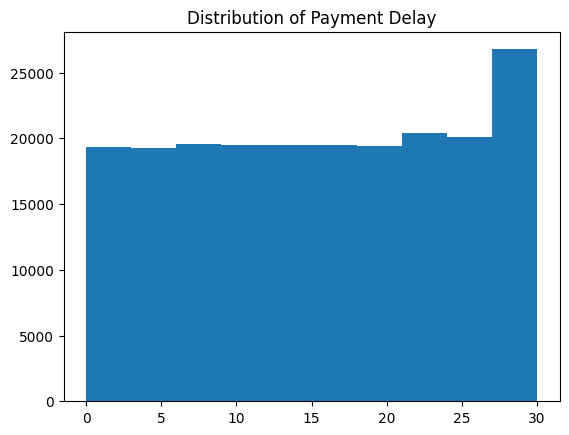

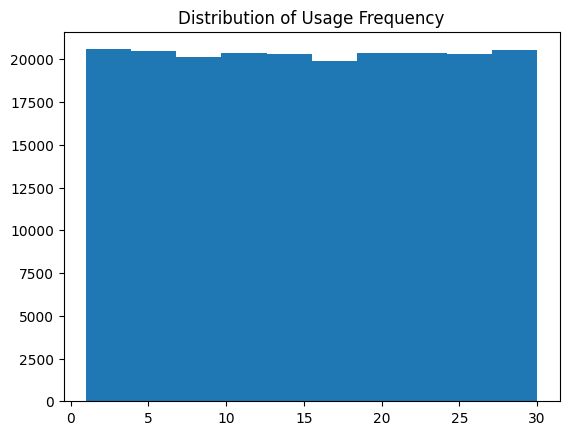

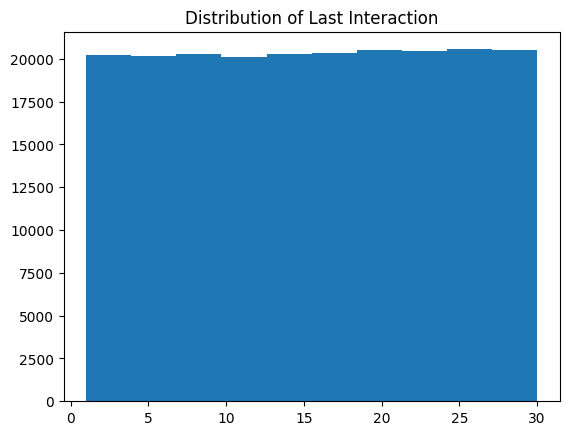

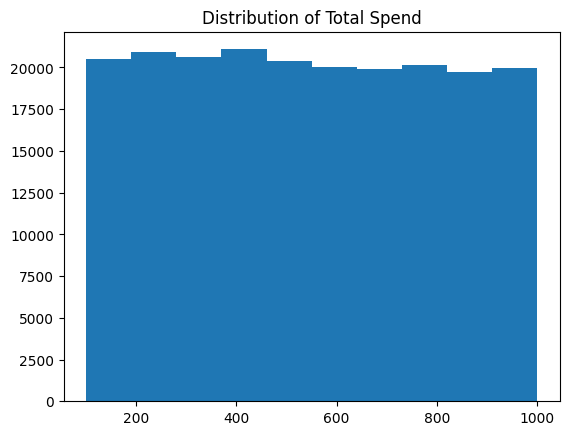

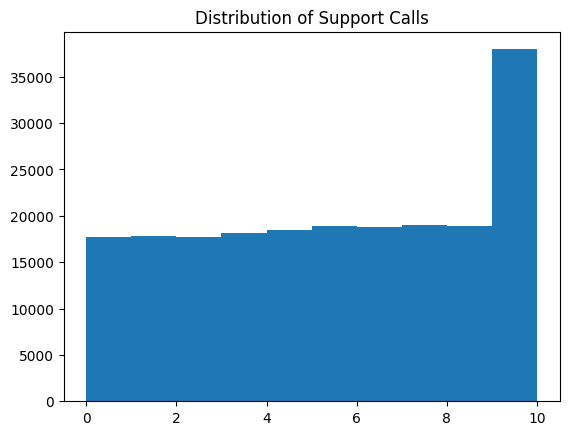

In [13]:
# Visualize each variable
for variable in key_variables:
    plt.hist(df_clean[variable])
    plt.title(f"Distribution of {variable}")
    plt.show()

In [14]:
# Group data by churn
churned = df_clean[df_clean["Churn"] == 1]
not_churned = df_clean[df_clean["Churn"] == 0]


In [15]:
# Compare means of key variables
for variable in key_variables:
    print(f"Mean of {variable} for churned customers: {churned[variable].mean()}")
    print(f"Mean of {variable} for non-churned customers: {not_churned[variable].mean()}")


Mean of Payment Delay for churned customers: 15.224321618103534
Mean of Payment Delay for non-churned customers: 9.998899284534948
Mean of Usage Frequency for churned customers: 15.483623710824071
Mean of Usage Frequency for non-churned customers: 16.15960374243258
Mean of Last Interaction for churned customers: 15.603789926904977
Mean of Last Interaction for non-churned customers: 12.916895982388553
Mean of Total Spend for churned customers: 541.431828426955
Mean of Total Spend for non-churned customers: 749.2905888827738
Mean of Support Calls for churned customers: 5.146780815059578
Mean of Support Calls for non-churned customers: 1.5960374243258117


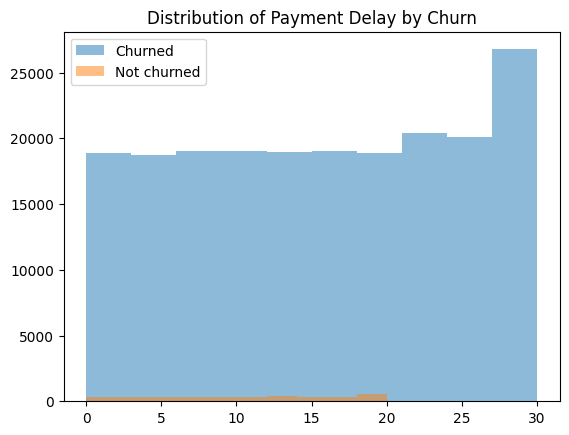

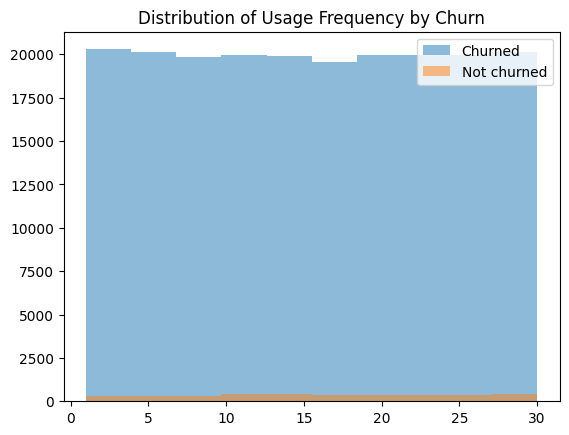

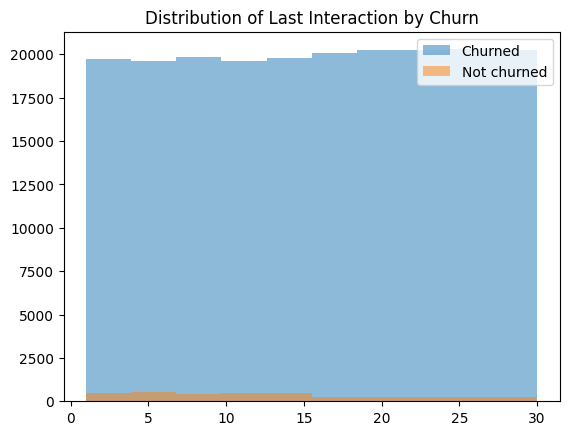

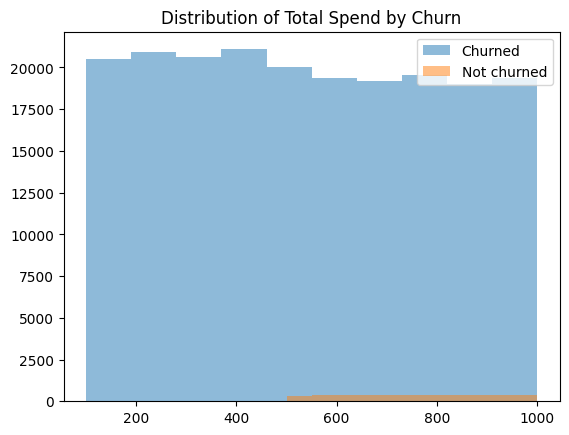

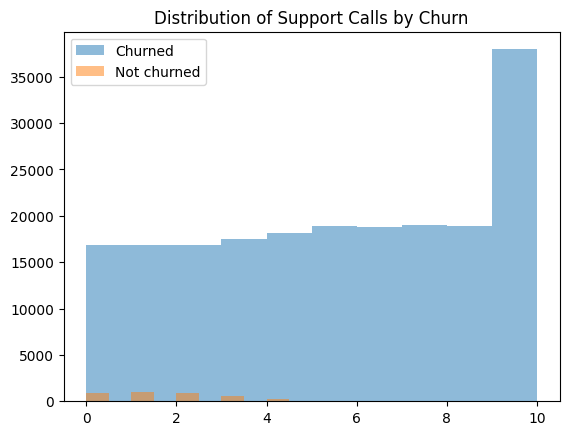

In [16]:
for variable in key_variables:
  plt.hist(churned[variable], alpha=0.5, label="Churned")
  plt.hist(not_churned[variable], alpha=0.5, label="Not churned")
  plt.title(f"Distribution of {variable} by Churn")
  plt.legend()
  plt.show()

In [17]:
# Perform statistical t-tests to compare groups
from scipy.stats import ttest_ind

for variable in key_variables:
    ttest, p_value = ttest_ind(churned[variable], not_churned[variable])
    print(f"T-test for {variable}: p-value = {p_value}")

T-test for Payment Delay: p-value = 1.0955190737605058e-266
T-test for Usage Frequency: p-value = 3.2639507190427524e-06
T-test for Last Interaction: p-value = 8.616770791043914e-77
T-test for Total Spend: p-value = 0.0
T-test for Support Calls: p-value = 0.0


The p-values for all five T-tests are very small (less than 0.05), which means that we can reject the null hypothesis that there is no difference between the groups. This suggests that there is a statistically significant difference between the groups for all five variables: **Payment Delay, Usage Frequency, Last Interaction, Total Spend, and Support Calls**

In [18]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = df_clean.drop("Churn", axis=1)
y = df_clean["Churn"]

In [19]:
X.head()

,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,14.0,5.0,18.0,932.0,17.0
1,1.0,10.0,8.0,557.0,6.0
2,4.0,6.0,18.0,185.0,3.0
3,21.0,7.0,7.0,396.0,29.0
4,20.0,5.0,8.0,617.0,20.0


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Print the size of the training and testing sets
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 142361, Testing set size: 61013


# MODEL SELECTION

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define a list of models to experiment with
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Print the model name and its performance metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print()

Model: LogisticRegression
Accuracy: 0.98
Precision: 0.98

Model: DecisionTreeClassifier
Accuracy: 0.97
Precision: 0.98

Model: RandomForestClassifier
Accuracy: 0.98
Precision: 0.98

Model: GradientBoostingClassifier
Accuracy: 0.98
Precision: 0.98



# FEATURE IMPORTANCE ANALYSIS

In [22]:
# Choose and train your preferred model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [23]:
# Extract Feature Importance Scores
importance_scores = model.coef_[0]
feature_names = X.columns

In [24]:
# creating and analyzing the df
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance Score": importance_scores
})
feature_importance_df = feature_importance_df.sort_values(by="Importance Score", ascending=False)

In [25]:
# Print the top 5 most important features
top_n = 5
print(f"Top {top_n} most important features:")
print(feature_importance_df.head(top_n))

Top 5 most important features:
            Feature  Importance Score
1     Support Calls          0.538491
2     Payment Delay          0.080501
4  Last Interaction          0.044285
3       Total Spend         -0.003986
0   Usage Frequency         -0.011716


Based on the provided table, the top 5 most important features in predicting customer churn are:

**Support Calls**: Customers who make more support calls are more likely to churn.

**Payment Delay**: Customers who delay their payments are more likely to churn.

**Last Interaction**: Customers who had their last interaction with the company a long time ago are more likely to churn.

**Total Spend**: Surprisingly, customers who spend more money do not seem to be more likely to churn.

**Usage Frequency**: Customers who use the company's services or products less frequently are more likely to churn.